
# Business Cases with Data Science 

## Case 1: Customer Segmentation

#### Semester: Spring 2020
#### Group (Palm & Company) Member:
1. Ana Claudia Alferes (M20190932)
2. Pedro Santos (M20190420)
3. Michael Machatschek (M20190054)
4. Lennart Dangers (M20190251)

#### This project follows the CRISP-DM Process:

1. Business Understanding
2. Data Understanding
3. Data Preparation
4. Modelling
5. Evaluation
6. Deployment

# Step 1: Business Understanding

# Step 2: Data Understanding

## Dataset Description

 Description of each variable 
 
 - var 1 ...
 
 
 
 #### The following code will help to explore and understand the entire dataset. 

In [55]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import category_encoders as ce
import collections
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import pycountry_convert as pc

In [2]:
path = "https://raw.githubusercontent.com/lennartda/business_cases_C1/master/Data/Dataset.csv"
df = pd.read_csv(path, sep=";")

In [3]:
#Set ID as an Index: Check if ID only contains unique values
#df.shape: (111733, 29)
#df["ID"].nunique(): 111733
df = df.set_index('ID')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 111733 entries, 1 to 111733
Data columns (total 28 columns):
Nationality             111733 non-null object
Age                     107561 non-null float64
DaysSinceCreation       111733 non-null int64
NameHash                111733 non-null object
DocIDHash               110732 non-null object
AverageLeadTime         111733 non-null int64
LodgingRevenue          111733 non-null float64
OtherRevenue            111733 non-null float64
BookingsCanceled        111733 non-null int64
BookingsNoShowed        111733 non-null int64
BookingsCheckedIn       111733 non-null int64
PersonsNights           111733 non-null int64
RoomNights              111733 non-null int64
DistributionChannel     111733 non-null object
MarketSegment           111733 non-null object
SRHighFloor             111733 non-null int64
SRLowFloor              111733 non-null int64
SRAccessibleRoom        111733 non-null int64
SRMediumFloor           111733 non-null int64
SRBa

In [5]:
summary=df.describe(include='all')
summary=summary.transpose()
summary.head(len(summary))

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Nationality,111733,199,FRA,16516,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Age,107561,NaN,NaN,NaN,45.6392,17.245,-10,33,47,58,123
DaysSinceCreation,111733,NaN,NaN,NaN,595.027,374.657,36,288,522,889,1385
NameHash,111733,107584,0x15A713CE687991691A18F6CDC56ABE24979C73CF5D51...,75,NaN,NaN,NaN,NaN,NaN,NaN,NaN
DocIDHash,110732,103480,0xE3B0C44298FC1C149AFBF4C8996FB92427AE41E4649B...,3032,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AverageLeadTime,111733,NaN,NaN,NaN,60.8331,85.1153,-1,0,21,95,588
LodgingRevenue,111733,NaN,NaN,NaN,283.851,379.132,0,0,208,393.3,21781
OtherRevenue,111733,NaN,NaN,NaN,64.6828,123.581,0,0,31,84,8859.25
BookingsCanceled,111733,NaN,NaN,NaN,0.00228223,0.0806315,0,0,0,0,15
BookingsNoShowed,111733,NaN,NaN,NaN,0.000599644,0.0282168,0,0,0,0,3


In [6]:
df.isnull().sum()

Nationality                0
Age                     4172
DaysSinceCreation          0
NameHash                   0
DocIDHash               1001
AverageLeadTime            0
LodgingRevenue             0
OtherRevenue               0
BookingsCanceled           0
BookingsNoShowed           0
BookingsCheckedIn          0
PersonsNights              0
RoomNights                 0
DistributionChannel        0
MarketSegment              0
SRHighFloor                0
SRLowFloor                 0
SRAccessibleRoom           0
SRMediumFloor              0
SRBathtub                  0
SRShower                   0
SRCrib                     0
SRKingSizeBed              0
SRTwinBed                  0
SRNearElevator             0
SRAwayFromElevator         0
SRNoAlcoholInMiniBar       0
SRQuietRoom                0
dtype: int64

In [7]:
# Check counts of categorical variables (excluding nationality)
cols = ['MarketSegment']
df[cols].apply(pd.Series.value_counts)

,MarketSegment
Other,63680
Direct,16363
Travel Agent/Operator,16353
Groups,11461
Corporate,2931
Complementary,657
Aviation,288


In [8]:
cols = ['DistributionChannel']
df[cols].apply(pd.Series.value_counts)

,DistributionChannel
Travel Agent/Operator,91019
Direct,16883
Corporate,3135
GDS Systems,696


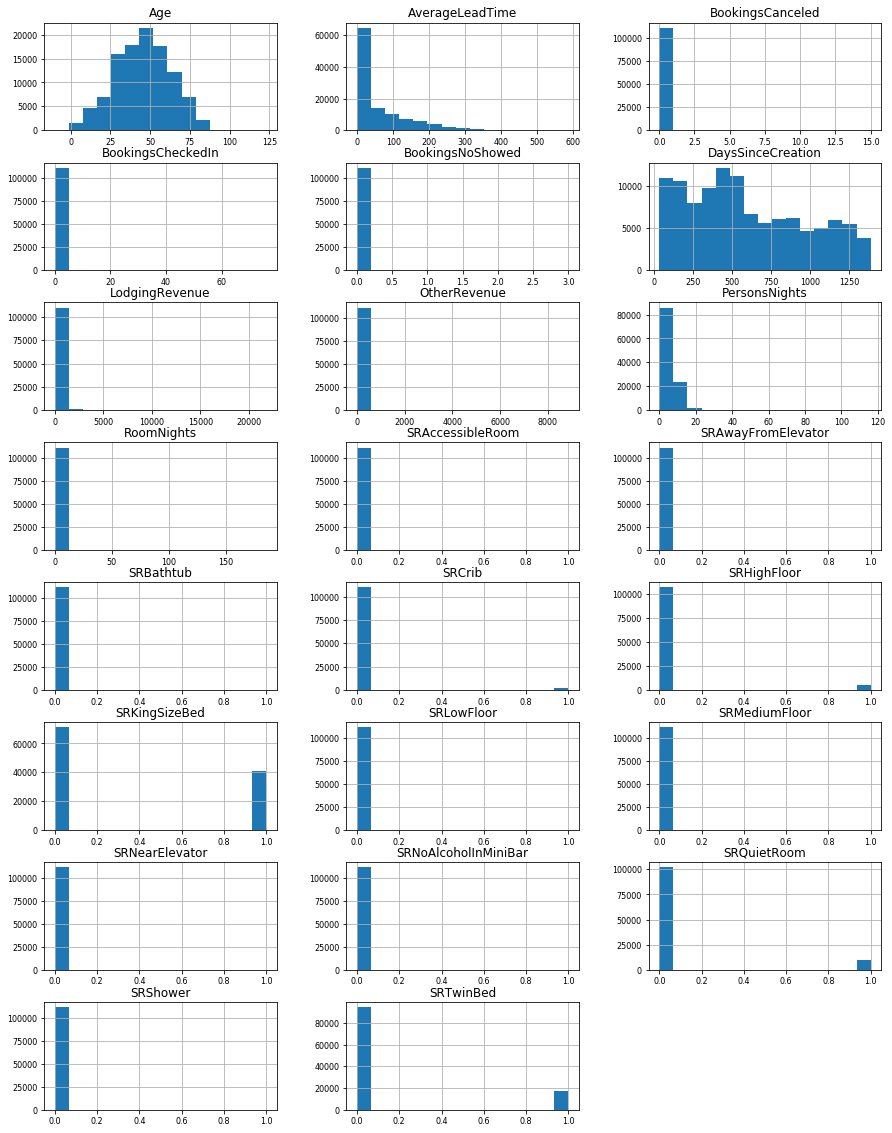

In [9]:
# Do histograms on all numeric variables
numerical=df.select_dtypes(include=[np.number]).columns.tolist()
df[numerical].hist(bins=15, figsize=(15, 20), layout=(8, 3), xlabelsize=8, ylabelsize=8);

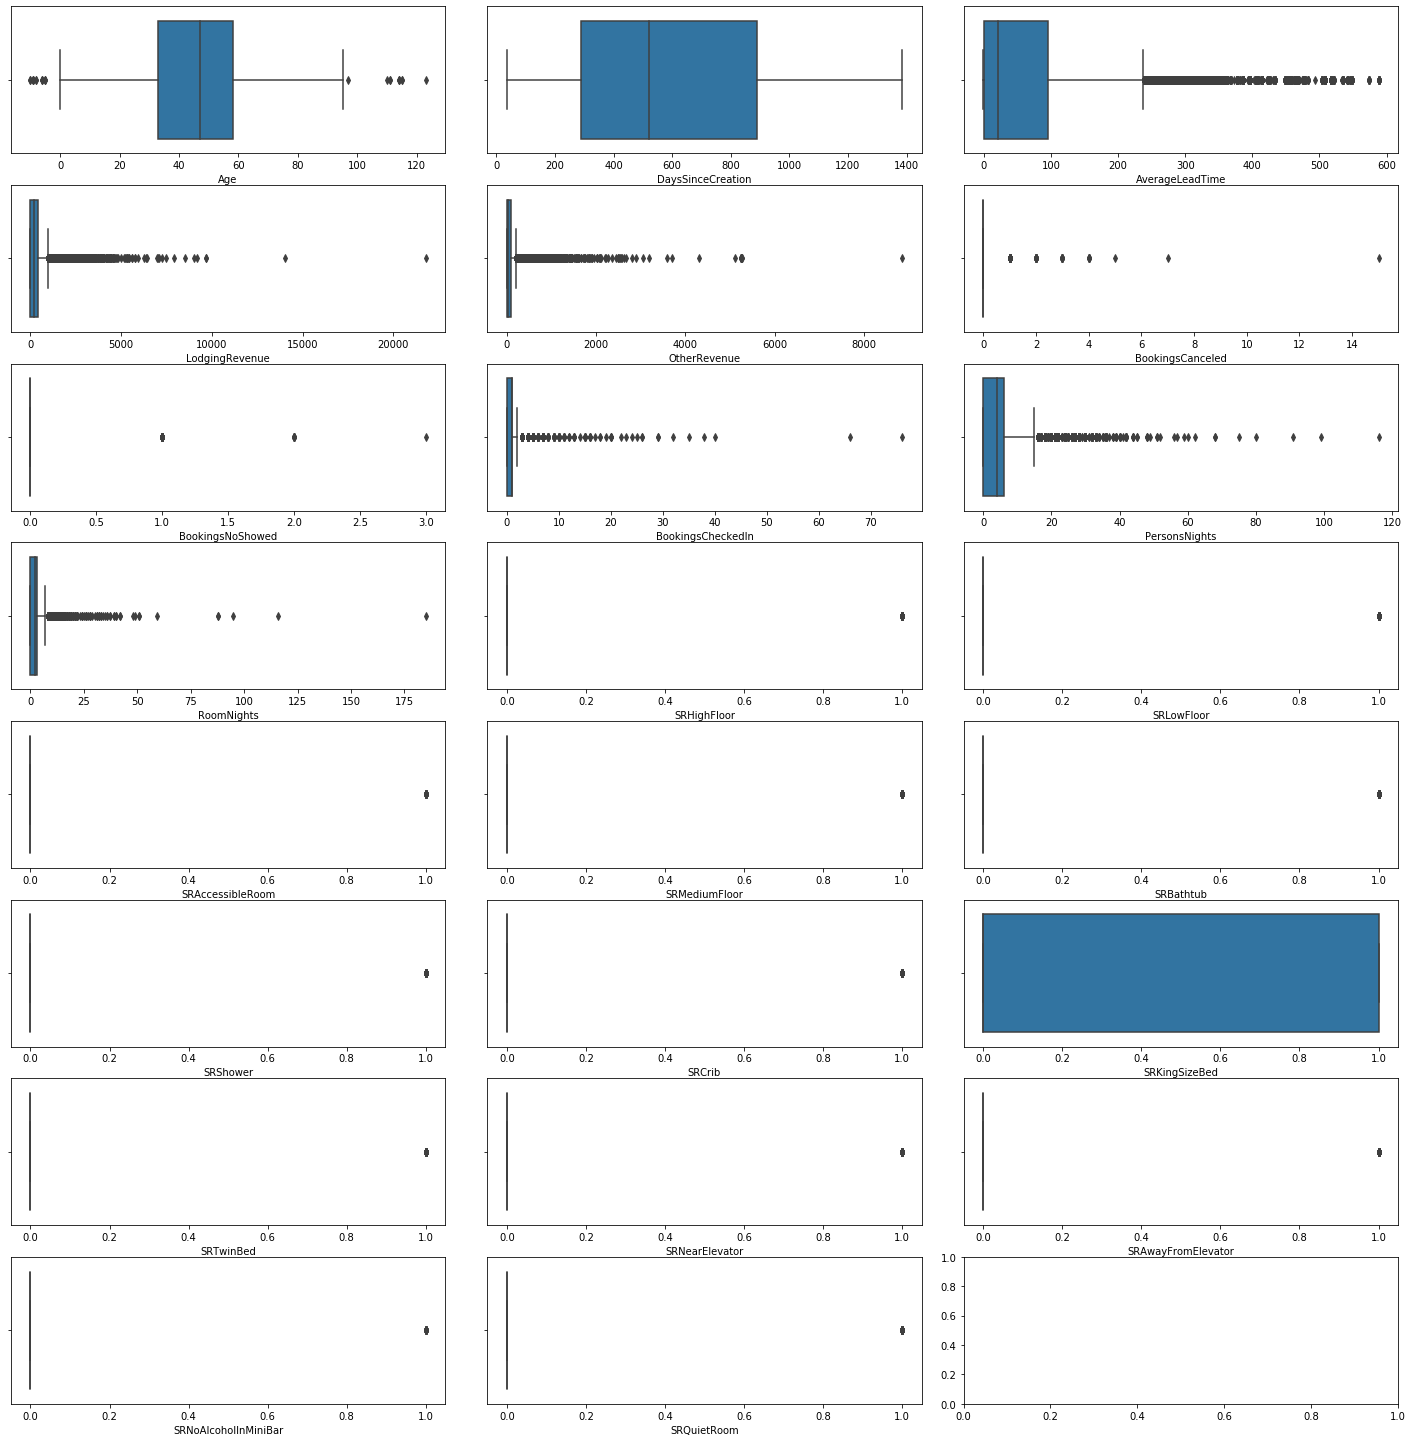

In [10]:
#boxplots to detect outliers
fig, ax = plt.subplots(8, 3, figsize=(20, 20))
fig.tight_layout()
for var, subplot in zip(df[numerical], ax.flatten()):
    sns.boxplot(df[var], ax=subplot)

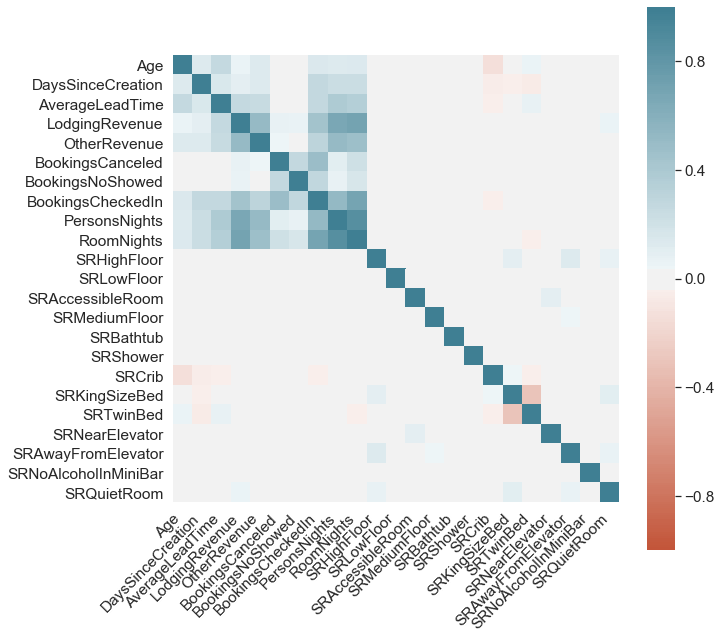

In [11]:
corr = df[numerical].corr()
plt.figure(figsize=(10, 10))
sns.set(font_scale=1.4)
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True,
    annot=False, annot_kws={"size": 12}
)
bottom, top = ax.get_ylim() # These two lines were added due to bug on current Seaborn version
ax.set_ylim(bottom + 0.5, top - 0.5) #
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

In [12]:
# Doc ID NaNs 
df[(df.BookingsCheckedIn != 0) & (df.DocIDHash !=df.DocIDHash)].T #Attended bookings

df[(df.BookingsCheckedIn == 0) & (df.DocIDHash !=df.DocIDHash)].T #Never been and no doc

df[(df.BookingsCheckedIn == 0) & (df.BookingsCanceled == 0)& (df.BookingsNoShowed == 0)] #Never been

,Nationality,Age,DaysSinceCreation,NameHash,DocIDHash,AverageLeadTime,LodgingRevenue,OtherRevenue,BookingsCanceled,BookingsNoShowed,...,SRMediumFloor,SRBathtub,SRShower,SRCrib,SRKingSizeBed,SRTwinBed,SRNearElevator,SRAwayFromElevator,SRNoAlcoholInMiniBar,SRQuietRoom
ID,,,,,,,,,,,,,,,,,,,,,
3,DEU,32.0,1385,0xDA46E62F66936284DF2844EC4FC542D0DAD780C0EE0C...,0x27F5DF762CCDA622C752CCDA45794923BED9F1B66300...,0,0.0,0.0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,FRA,52.0,1385,0xD2E3D5BFCA141865669F98D64CDA85AD04DEFF47F8A0...,0x42BDEE0E05A9441C94147076EDDCC47E604DA5447DD4...,0,0.0,0.0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,JPN,50.0,1385,0x94DB830C90A6DA2331968CFC9448AB9A3CE07D7CFEDD...,0x47E5E4B21585F1FD956C768E730604241B380EDFEA68...,0,0.0,0.0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,FRA,43.0,1385,0x44BB41EF2D87698E75B6FBB77A8815BF48DAA912C140...,0x6C456E45A78A20BC794137AE326A81D587B6528B3944...,0,0.0,0.0,0,0,...,0,0,0,0,1,0,0,0,0,0
11,IRL,28.0,1385,0x606584F7B9D6A1905BF9B7ED7B7EBE5DF17DF22FECDF...,0xCA46CD508DB3DB2085374141177E07ECEC4B724AE41C...,0,0.0,0.0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
111724,ITA,56.0,37,0x82277FA4AD074DA9786E64E977C94FEF1C2E47CD6212...,0x5ED6055421E857EA3496D4C75FA2237ACD353DB1B64B...,0,0.0,0.0,0,0,...,0,0,0,0,1,0,0,0,0,0
111726,PAN,60.0,37,0xAA3529E305173010BADE927C7015FA091C3883D257E9...,0xDC47997245A7B9ACF9D4974149D2100CEB00981A2F03...,0,0.0,0.0,0,0,...,0,0,0,0,0,1,1,0,0,0
111729,DEU,31.0,36,0x2F59F0E86596B861C3303585FDB7F090B1B2D70442C5...,0x86AC02B9393E7F58354BA4193D792C07DB91D4BE27C7...,0,0.0,0.0,0,0,...,0,0,0,0,1,0,0,0,0,0


# Step 3: Data Preparation

In [13]:
X = df.copy(deep= True)

In [14]:
# Remove columns that should not be used as they do not represent customer's characteristics or behavior
cols = ['MarketSegment']
X.drop(columns=cols, inplace=True)

In [15]:
# Drop customers with zero revenue but positive checkins, because we assume these are mostly bookings from staff
X = X[~((X.LodgingRevenue == 0)&(X.BookingsCheckedIn >=1))] 

# Drop customers with zero cancellend, no show and checked in bookings, because we assume that these are from older systems
X = X[~((X.BookingsCanceled == 0)&(X.BookingsNoShowed == 0)&(X.BookingsCheckedIn ==0))] 

In [16]:
X["IDMerge"] = X.DocIDHash + " + " +X.NameHash + " + "+X.Nationality

In [17]:
#Merge remaining duplicated rows with same DocIdHash
def modef(x):
    return x.mode()[0]

aggregation_functions = {'Nationality': modef, 'Age': 'mean', 'DaysSinceCreation': 'first','NameHash': 'first','AverageLeadTime': 'mean'
                        ,'LodgingRevenue': 'sum','OtherRevenue': 'sum','BookingsCanceled': 'sum','BookingsNoShowed': 'sum','BookingsCheckedIn': 'sum','PersonsNights': 'sum','RoomNights': 'sum'
                        ,'DistributionChannel': modef,'SRHighFloor': "last",'SRLowFloor':"last",'SRAccessibleRoom': "last",'SRMediumFloor':"last",
                        'SRBathtub': "last",'SRShower': "last",'SRCrib': "last",'SRKingSizeBed': "last",
                        'SRTwinBed': "last",'SRNearElevator': "last",'SRAwayFromElevator': "last",'SRNoAlcoholInMiniBar': "last",
                        'SRQuietRoom': "last"}

X_new = X.groupby(X['IDMerge']).aggregate(aggregation_functions)
X_new = X_new.reset_index()

In [18]:
# Outlier handling 
# Treat negative AverageLeadTime as real time booking; averageleadtime = 0
#X_new[X_new.AverageLeadTime>360]

# Everything looks fine
#X_new[X_new.LodgingRevenue > 10000]

#Create a new feature to check for outliers
X_new["PricePerNight"] = X_new.LodgingRevenue / X_new.RoomNights
# Everything looks fine

#X_new[X_new.PricePerNight > 1500]

# Everything looks fine
#X_new[X_new.OtherRevenue > 4000]

#Create a new feature to check for outliers
X_new["OtherRevenuePerPersonNight"] = X_new.OtherRevenue / X_new.PersonsNights

# Everything looks fine apart from inf
#X_new[X_new["OtherRevenuePerPersonNight"]>1000]

# Only 1 case where looks like staff (2.2€per night). Define a min price per night and drop customers below.
#X_new[X_new.BookingsCanceled > 14]

#Most clients have decent price per night/other revenue (most are corporate) and theres the staff guy from above.
#X_new[X_new.BookingsCheckedIn > 30]

#Most clients have decent price per night/other revenue (also they are corporate) and theres the staff guy from above.
#X_new[X_new.PersonsNights > 80]

#Most clients have decent price per night/other revenue (also they are corporate) and theres the staff guy from above.
#X_new[X_new.RoomNights > 75]





In [20]:
#X_new[(X_new.RoomNights>1) & (X_new.PersonsNights==0)].T
#Check why this happens w/ teacher

In [34]:
# Drop customers with infinitive OtherRevenuePerPersonNight 
X_new = X_new[X_new.OtherRevenuePerPersonNight < 10000]

In [21]:
#Filling NaNs in Age
X_new[X_new.Age >100 ]
#Drop Nans, negatives and values above 100 and then try to recluster them 
dropped_age = X_new[(X_new.Age >100)|(X_new.Age <0)|(X_new.Age != X_new.Age)]
X_new = X_new[~((X_new.Age >100)|(X_new.Age <0)|(X_new.Age != X_new.Age))]


In [66]:
#Feature Engineering 
#Already created the price per room + other revenue per person per night 
X_new["PersonPerRoom"] = X_new.PersonsNights / X_new.RoomNights

# Create feature with continent of nationality 
cc_alpha2 = [pc.country_alpha3_to_country_alpha2(x) if x != "TMP" else "AQ" for x in X_new["Nationality"].values]
X_new["Continent"] = [pc.country_alpha2_to_continent_code(x) if x not in ["AQ", "PN", "TF", "UM"] else "Undefined" for x in cc_alpha2]
X_new["Continent"].value_counts()

C:\Users\Michael\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Michael\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


EU           60831
NA            4849
AS            2923
SA            2827
OC             765
AF             714
Undefined        9
Name: Continent, dtype: int64

(72922, 2)


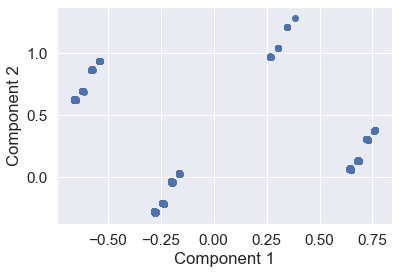

In [23]:
# Let'start to visualize with only two components
SR = X_new.columns.values[14:-3]
pca2 = PCA(n_components = 2)
pca2.fit(X_new[SR])
X_pca2 = pca2.transform(X_new[SR]) # Apply the dimension reduction to the dataset
print(X_pca2.shape)

# Plot a scatter plot of the two Principal Components by the "target" to see if there is any pattern
plt.scatter(X_pca2[:, 0], X_pca2[:, 1])
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.show()

In [24]:
# Fit the PCA algorithm to data 
pca = PCA().fit(X_new[SR])

# Show the variance per component
pcaevr = ['{:f}'.format(item) for item in pca.explained_variance_ratio_]
pcaDF = pd.DataFrame({'Component': range(1, len(X_new[SR].columns)+1),
                      'Variance explained': pcaevr,
                      'Cumulative variance explained': np.cumsum(pca.explained_variance_ratio_)})
pcaDF
#2 PCAs explain most of the variance so it is a fair assumption that we can use them.

,Component,Variance explained,Cumulative variance explained
0,1,0.504963,0.504963
1,2,0.216384,0.721347
2,3,0.156373,0.877719
3,4,0.079095,0.956814
4,5,0.021026,0.977840
5,6,0.007330,0.985169
6,7,0.005925,0.991094
7,8,0.003397,0.994491
8,9,0.002523,0.997014
9,10,0.001479,0.998493


In [25]:
#Age Binning

X_new["AgeBinned"] = X_new.Age.apply(lambda x: '0-24' if x >= 0 and x <=24 else ('25-44' if x>=25 and x<=44 else ('45-64' if x>=45 and x<=64 else '65+')))
X_new.AgeBinned.value_counts()


45-64    31614
25-44    26484
65+      11025
0-24      3799
Name: AgeBinned, dtype: int64

In [26]:
#AverageLeadTime binning
#0-7
#8-30
#31-90
#91-365
#366+

X_new["LeadTimeBinned"] = X_new.AverageLeadTime.apply(lambda x: '0-7' if x>=0 and x<8 else ('8-30' if x>=8 and x<31 else ('31-90' if x>=31 and x<91 else('91-365' if x>=91 and x<366 else '366+'))))


In [27]:
#Feature engineering part2

# Create new dataframe with variables used for kmeans 

X_model = pd.DataFrame() 
X_model["DaysSinceCreation"] = X_new["DaysSinceCreation"] 
X_model["PricePerNight"] = X_new["PricePerNight"] 
X_model["OtherRevenuePerPersonNight"] = X_new["OtherRevenuePerPersonNight"] 
X_model["BookingsCheckedIn"] = X_new["BookingsCheckedIn"] 
X_model["PersonsPerBooking"] = X_new["PersonsNights"]/X_new["RoomNights"] 
X_model = X_model[X_model.OtherRevenuePerPersonNight < 10000]

In [28]:
# Normalization: (X_model) 

cols = list(X_model.columns) # save the name of the columns 
X_model_array = X_model.values # returns a numpy array 
min_max_scaler = preprocessing.MinMaxScaler() 
X_model_scaled = min_max_scaler.fit_transform(X_model_array) 
X_model_norm = pd.DataFrame(X_model_scaled, columns=cols) 

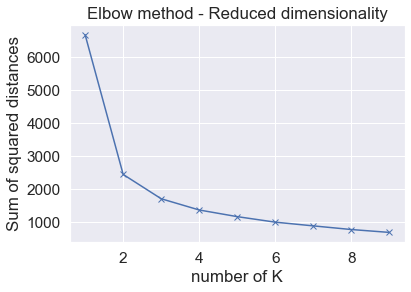

In [29]:
# Select K based on the sum of squared distances 

ssd = [] 

K = range(1,10) 
for k in K: 
    km = KMeans(n_clusters=k, random_state=123) 
    km = km.fit(X_model_norm) 
    ssd.append(km.inertia_) 

# Plot results in an elbow graph 
plt.plot(K, ssd, 'bx-') 
plt.xlabel('number of K') 
plt.ylabel('Sum of squared distances') 
plt.title('Elbow method - Reduced dimensionality') 
plt.show() 

In [36]:
# Apply the K-Means for K= .... #fixed random_state!  
K= 3
kmeans = KMeans(n_clusters=K, random_state=123) 
kmeans.fit(X_model_norm) 
y_kmeans = kmeans.predict(X_model_norm) 
X_model["Cluster"]=y_kmeans
X_new["Cluster"] = y_kmeans

C:\Users\Michael\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In [31]:
cluster_centroids = pd.DataFrame(min_max_scaler.inverse_transform(X=kmeans.cluster_centers_), columns = X_model_norm.columns) 
cluster_centroids

,DaysSinceCreation,PricePerNight,OtherRevenuePerPersonNight,BookingsCheckedIn,PersonsPerBooking
0,729.013474,135.555944,15.039624,1.074583,1.947305
1,271.798010,146.480118,16.179850,1.055993,1.922972
2,1142.117850,112.171536,15.731455,1.109486,1.985546


In [32]:
X_model

,DaysSinceCreation,PricePerNight,OtherRevenuePerPersonNight,BookingsCheckedIn,PersonsPerBooking,Cluster
0,480,165.000000,27.000000,2,2.0,1
1,1197,139.000000,10.000000,1,2.0,2
2,755,165.000000,4.000000,1,3.0,0
3,673,79.000000,23.866667,1,1.0,0
4,94,84.000000,33.000000,1,1.0,1
...,...,...,...,...,...,...
75643,159,106.000000,8.000000,1,2.0,1
75644,209,85.500000,12.400000,1,2.0,1
75645,783,109.000000,7.000000,1,1.0,0
75646,46,130.242857,2.214286,1,2.0,1


In [39]:
X_new.columns.values

array(['IDMerge', 'Nationality', 'Age', 'DaysSinceCreation', 'NameHash',
       'AverageLeadTime', 'LodgingRevenue', 'OtherRevenue',
       'BookingsCanceled', 'BookingsNoShowed', 'BookingsCheckedIn',
       'PersonsNights', 'RoomNights', 'DistributionChannel',
       'SRHighFloor', 'SRLowFloor', 'SRAccessibleRoom', 'SRMediumFloor',
       'SRBathtub', 'SRShower', 'SRCrib', 'SRKingSizeBed', 'SRTwinBed',
       'SRNearElevator', 'SRAwayFromElevator', 'SRNoAlcoholInMiniBar',
       'SRQuietRoom', 'PricePerNight', 'OtherRevenuePerPersonNight',
       'PersonPerRoom', 'AgeBinned', 'LeadTimeBinned', 'Cluster'],
      dtype=object)

In [49]:
pd.crosstab(X_new["Cluster"], X_new["AgeBinned"])

AgeBinned,0-24,25-44,45-64,65+
Cluster,,,,
0,1134,8855,11211,3845
1,1795,10064,10774,3784
2,870,7562,9628,3396


In [52]:
pd.crosstab(X_new["Cluster"], X_new["Nationality"])

Nationality,ABW,AFG,AGO,AIA,ALB,AND,ARE,ARG,ARM,ASM,...,USA,UZB,VEN,VIR,VNM,WLF,WSM,YEM,ZAF,ZWE
Cluster,,,,,,,,,,,,,,,,,,,,,
0,1,0,32,1,3,1,22,62,2,2,...,1004,2,9,0,4,0,0,0,26,1
1,1,2,69,0,5,2,3,33,6,1,...,1735,1,9,2,5,1,1,1,22,0
2,1,0,57,1,7,0,2,67,2,0,...,602,0,4,0,2,0,0,0,17,0


In [53]:
pd.crosstab(X_new["Cluster"], X_new["DistributionChannel"])

DistributionChannel,Corporate,Direct,GDS Systems,Travel Agent/Operator
Cluster,,,,
0,712,3210,183,20940
1,587,4356,285,21189
2,839,2281,107,18229


In [67]:
pd.crosstab(X_new["Cluster"], X_new["LeadTimeBinned"])

LeadTimeBinned,0-7,31-90,366+,8-30,91-365
Cluster,,,,,
0,3403,6934,854,4550,9304
1,3501,7063,28,4943,10882
2,3843,6656,134,4256,6567


In [68]:
pd.crosstab(X_new["Cluster"], X_new["Continent"])

Continent,AF,AS,EU,NA,OC,SA,Undefined
Cluster,,,,,,,
0,227,1052,20912,1524,256,1073,1
1,233,1013,21293,2495,377,1001,5
2,254,858,18626,830,132,753,3
